# PARKINSON DISEASE PREDICTION

# Importing the Dependencies

In [18]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv(r"C:\Users\dell\Documents\INTERNSHIP\Intern Projects\Parkinson Disease Prediction\Parkinsson disease.csv")

# Data Pre-processing & EDA

Attribute Information:

Name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency
    
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    
MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency
                    
MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude
                        
NHR , HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

In [77]:
# printing the first 5 rows of the dataframe
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# printing the last 5 rows of the dataframe
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
# number of rows and columns in the dataframe
df.shape

(195, 24)

In [6]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [7]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

There are 22 float columns, 1 integer and 1 object column.
There are no null values

In [26]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


There are no duplicate rows present in the dataset.

In [27]:
# checking for missing values in each column
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no missing values in any column of the dataset.

In [28]:
# getting some statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


There are some outliers as we can see some attributes have huge difference in their 75 percentile value and maximum value.

In [29]:
df['status'] = df['status'].astype('uint8')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

The type of "status" column is changed from int64 to uint8.

# Visualisations

<ipython-input-21-3b04249ff09d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


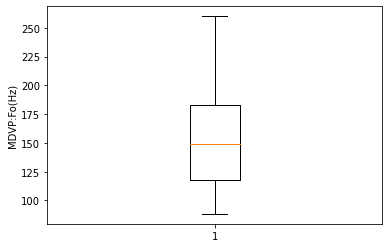

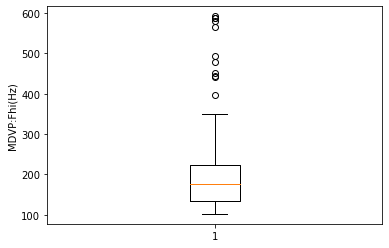

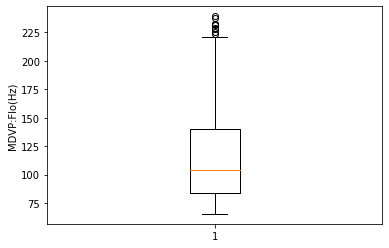

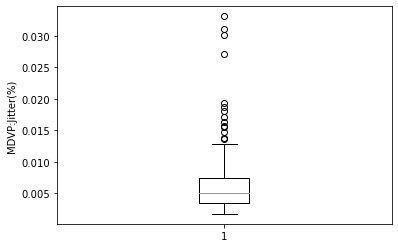

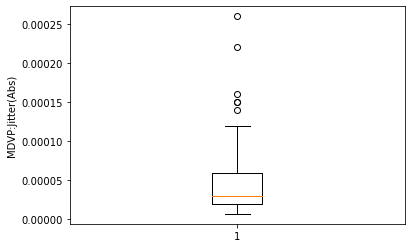

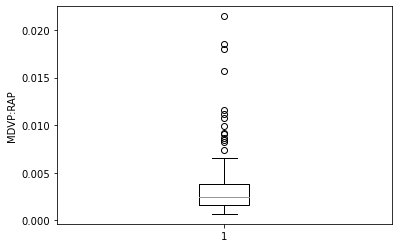

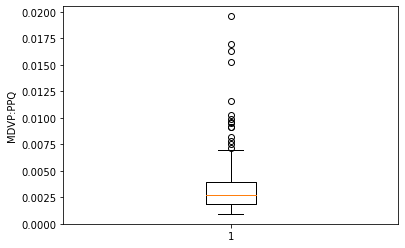

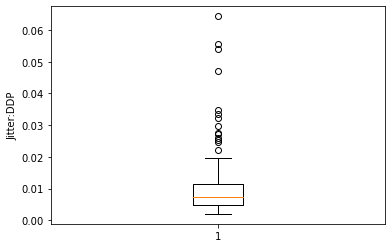

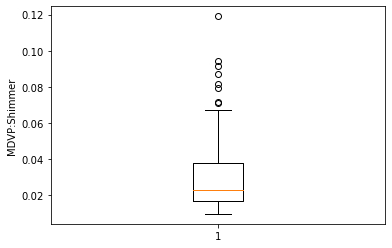

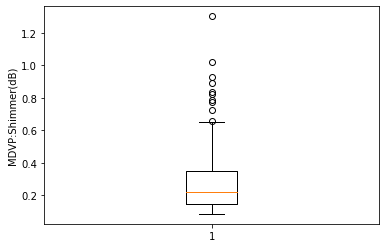

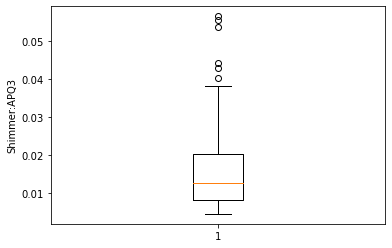

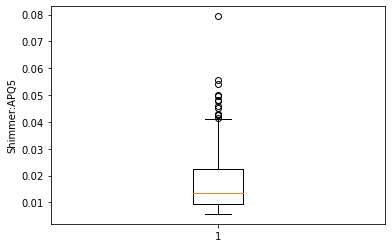

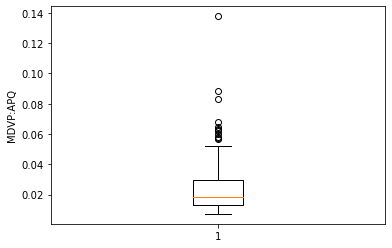

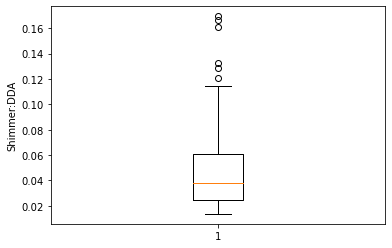

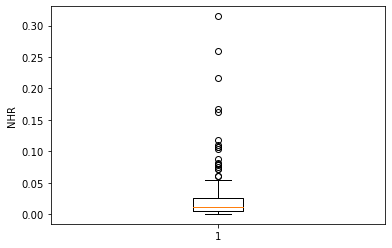

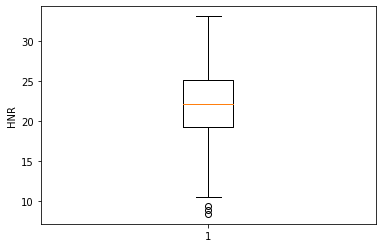

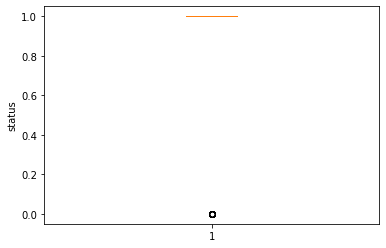

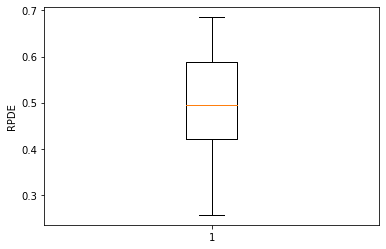

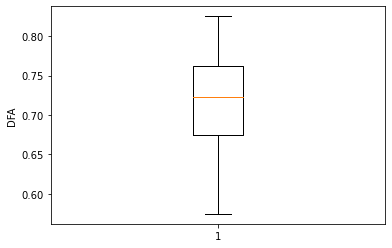

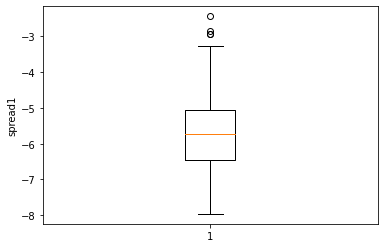

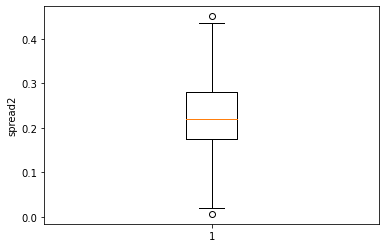

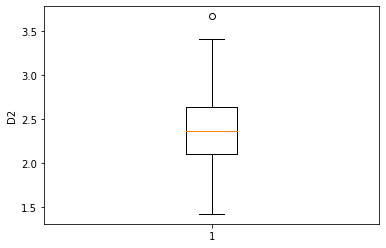

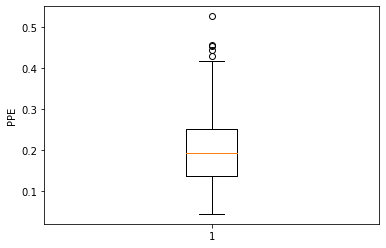

In [21]:
# plotting box plots to visualise the outliers
for i in df.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    plt.ylabel(i)

As we had seen previously in statistical summary, we had some outliers also present in data.

In [33]:
# distribution of 'status' Variable
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:ylabel='status'>

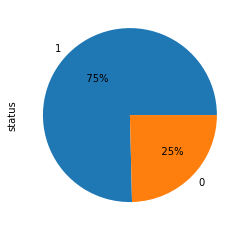

In [35]:
# plotting pie chart for status
df['status'].value_counts().plot(kind='pie', autopct = "%5.0f%%")

Target column - status is imbalanced as 75% is for 1 and rest 25% is for 0

We have 48 healthy patients and 147 parkinson disease affected patients.

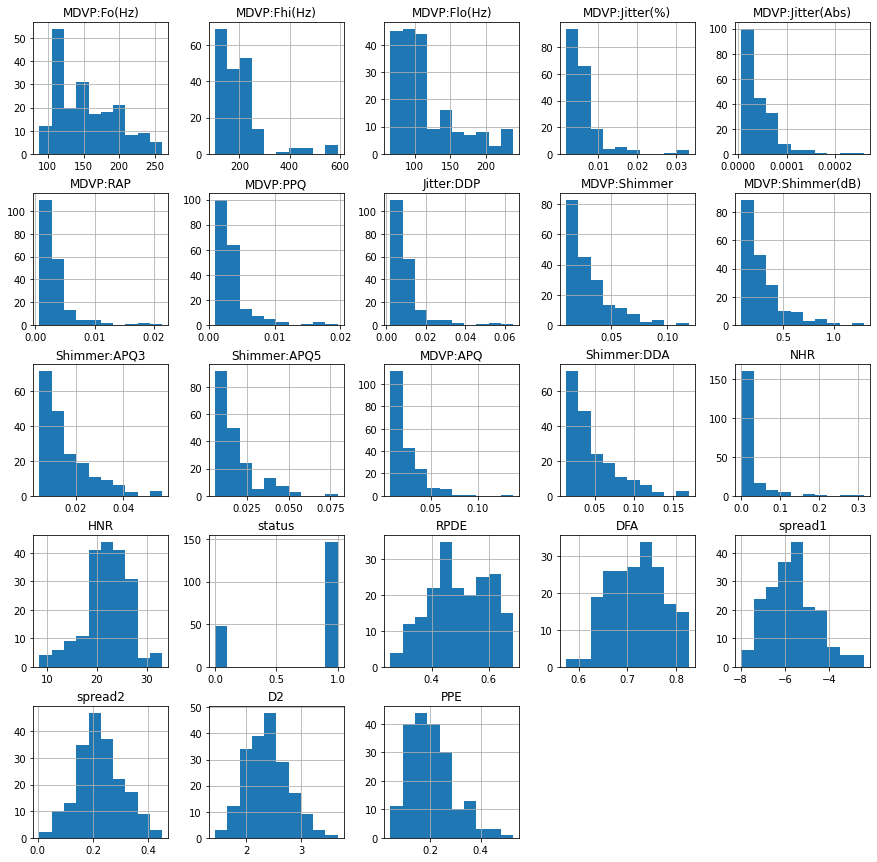

In [24]:
# plotting histogram for each column
df.hist(figsize=(15,15));

We can see some of the data is normally distributed and most of the attributes are right skewed

Text(0.5, 1.0, 'status vs DFA')

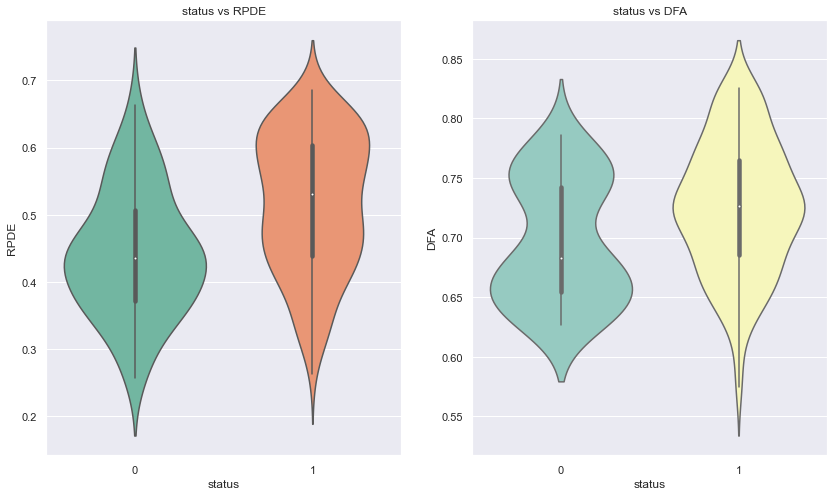

In [74]:
# Visualisation
df["status"] %= 2
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

# plotting b/w status & RPDE
sns.violinplot(x="status", y="RPDE", data=df, ax=axis1, palette="Set2")
axis1.set_title("status vs RPDE")

# plotting b/w status & DFA
sns.violinplot(x="status", y="DFA", data=df, ax=axis2, palette="Set3")
axis2.set_title("status vs DFA")

It visualises the column RPDE & DFA with status.

Text(0.5, 1.0, 'status vs HNR')

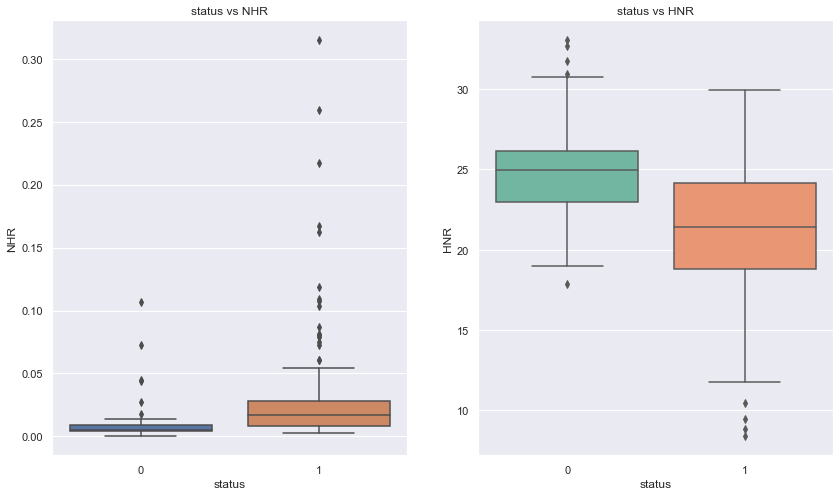

In [76]:
# visualisation
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

# plotting b/w status & NHR
sns.boxplot(x="status", y="NHR", data=df, ax=axis1)
axis1.set_title("status vs NHR")

# plotting b/w status & HNR
sns.boxplot(x="status", y="HNR", data=df, ax=axis2, palette="Set2")
axis2.set_title("status vs HNR")

It depicts the outliers b/w status & NHR - HNR.

# 1 - Parkinson's positive
# 0 - Healthy

In [39]:
# grouping the data based on the target variable
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Separating the features and target

In [36]:
# separating the features from the target
X = df.drop(columns=['name','status'], axis=1)
Y = df['status']

In [37]:
# printing X
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [38]:
# printing Y
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: uint8


# Splitting the data as training & test data

In [39]:
# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
# printing splitted data
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# Data Standardisation

In [41]:
# performing standardisation
scaler = StandardScaler()

In [42]:
# fitting the training set
scaler.fit(X_train)

StandardScaler()

In [43]:
# transforming the train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# printing the training data
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


# Model Training 

# Logistic Regression

In [45]:
# importing libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression

# using inbuilt function
model_1 = LogisticRegression(solver = 'lbfgs', max_iter = 300)

# fit the data
model_1.fit(X_train, Y_train)

# Get predictions
lr_preds = model_1.predict(X_test)

# Support Vector Machine Model

In [48]:
# importing libraries for Support Vector Machine
from sklearn import svm

# using inbuilt function
model_2 = svm.SVC()

# fit the data
model_2.fit(X_train,Y_train)

# Get predictions
svm_preds = model_2.predict(X_test)

# Naive Bayes Classifier

In [49]:
# importing libraries for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# using inbuilt function
model_3 = GaussianNB()

# fit the data
model_3.fit(X_train,Y_train)

# Get predictions
nb_preds = model_3.predict(X_test)

# Decision Tree Classifier

In [50]:
# importing libraries for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# using inbuilt function
model_4 = DecisionTreeClassifier()

# fit the data
model_4.fit(X_train, Y_train)

# Get predictions
dt_preds = model_4.predict(X_test)

# Random Forest Classifier

In [51]:
# importing libraries for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# using inbuilt function
model_5 = RandomForestClassifier()

# fit the data
model_5.fit(X_train,Y_train)

# Get predictions
rf_preds = model_5.predict(X_test)

# Model Evaluation

# Accuracy Score

In [56]:
# importing libraries for accuracy test
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

#calculating accuracy metrics
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(Y_test, dt_preds), f1_score(Y_test, dt_preds), recall_score(Y_test, dt_preds), precision_score(Y_test, dt_preds), r2_score(Y_test, dt_preds)],
        'RF':[accuracy_score(Y_test, rf_preds), f1_score(Y_test, rf_preds), recall_score(Y_test, rf_preds), precision_score(Y_test, rf_preds), r2_score(Y_test, rf_preds)],
        'LR':[accuracy_score(Y_test, lr_preds), f1_score(Y_test, lr_preds), recall_score(Y_test, lr_preds), precision_score(Y_test, lr_preds), r2_score(Y_test, lr_preds)],
        'SVM':[accuracy_score(Y_test, svm_preds), f1_score(Y_test, svm_preds), recall_score(Y_test, svm_preds), precision_score(Y_test, svm_preds), r2_score(Y_test, svm_preds)],
        'NB':[accuracy_score(Y_test, nb_preds), f1_score(Y_test, nb_preds), recall_score(Y_test, nb_preds), precision_score(Y_test, nb_preds), r2_score(Y_test, nb_preds)]
}
chart = pd.DataFrame(chart)

In [57]:
# displaying the result
display(chart)

,Metric,DT,RF,LR,SVM,NB
0,Accuracy,0.769231,0.769231,0.820513,0.897436,0.615385
1,F1-Score,0.836364,0.842105,0.885246,0.939394,0.680851
2,Recall,0.741935,0.774194,0.870968,1.000000,0.516129
3,Precision,0.958333,0.923077,0.900000,0.885714,1.000000
4,R2-Score,-0.415323,-0.415323,-0.100806,0.370968,-1.358871


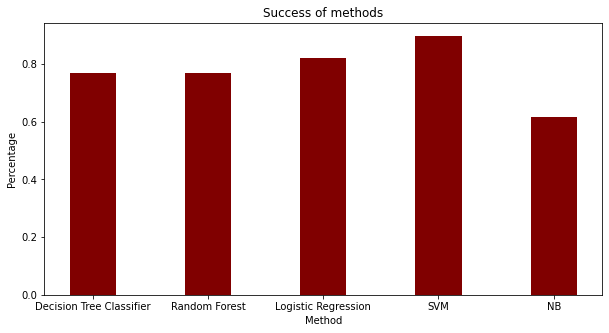

In [62]:
#plotting the success of machine learning models
data={'Decision Tree Classifier':accuracy_score(Y_test, dt_preds),'Random Forest':accuracy_score(Y_test, rf_preds),'Logistic Regression':accuracy_score(Y_test, lr_preds),'SVM':accuracy_score(Y_test, svm_preds),'NB':accuracy_score(Y_test, nb_preds)}
method=list(data.keys())
percentage=list(data.values())
fig=plt.figure(figsize=(10,5))
plt.bar(method,percentage,color='maroon',width=0.4)
plt.xlabel("Method")
plt.ylabel("Percentage")
plt.title("Success of methods")
plt.show()

RESULT: 

Decision Tree classifier got 76.92% accuracy on the test set.

Random Forest classifier got 76.92% accuracy on the test set.

Logistic Regression got 82.05% accuracy on the test set.

Support Vector Machine got 89.74% accuracy on the test set.

Naive Bayes Classifier got 61.53% accuracy on the test set.

The best overall performance (accuracy) on the test set is seen with SUPPORT VECTOR MACHINE MODEL - 89.74%.

# Building a Predictive System

In [59]:
# setting a input data
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

# predicting
prediction = model_2.predict(std_data)
print(prediction)

# printing the result
if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


PREDICTION RESULT:

Predicted Output of the person is 0, that is the person is healthy.